# Image classification by types

In [5]:
# Install necessary libraries if they're not already installed
!pip install tensorflow numpy matplotlib


# Import Necessary Libraries

We will import all the necessory libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Prepare the Data

In this we will be loading the data and we will convert the image file to a standard file format

In [7]:
# Set the path to your dataset
dataset_path = '/Users/vishruthsmanju/Downloads/Image data'

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of the data as validation data
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 751 images belonging to 4 classes.
Found 187 images belonging to 4 classes.


The output indicates that our dataset has been split into training and validation subsets, with images sorted into four categories.

# Model Building

Here we are using CNN that is Convolutional Neural Network which is an most efficient model to build to detect the image data

In [12]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape explicitly at the start
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

Our model summary shows that the network is set up  with the layers for a convolutional neural network aimed to image classification. We have 19,035,716 trainable parameters.

# Training the Model

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,  
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size  
)



Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 738ms/step - accuracy: 0.5983 - loss: 1.0205 - val_accuracy: 0.5875 - val_loss: 1.0421
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5938 - loss: 1.1119 - val_accuracy: 0.6296 - val_loss: 0.9400
Epoch 3/20


2024-04-22 20:22:06.914518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:22:07.030335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 733ms/step - accuracy: 0.6078 - loss: 1.0091 - val_accuracy: 0.5813 - val_loss: 1.0604
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.2728 - val_accuracy: 0.6667 - val_loss: 0.9523
Epoch 5/20


2024-04-22 20:22:28.589570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:22:28.652339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 707ms/step - accuracy: 0.5917 - loss: 0.9974 - val_accuracy: 0.6250 - val_loss: 0.9858
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6250 - loss: 1.1244 - val_accuracy: 0.6296 - val_loss: 0.8744
Epoch 7/20


2024-04-22 20:22:50.343555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:22:50.469559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 696ms/step - accuracy: 0.6278 - loss: 0.9323 - val_accuracy: 0.6125 - val_loss: 0.9479
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6875 - loss: 0.6778 - val_accuracy: 0.5926 - val_loss: 1.1395
Epoch 9/20


2024-04-22 20:23:12.009391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:23:12.149084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 724ms/step - accuracy: 0.6621 - loss: 0.8970 - val_accuracy: 0.6187 - val_loss: 0.9000
Epoch 10/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 7s 321ms/step - accuracy: 0.5938 - loss: 1.0731

2024-04-22 20:23:34.277485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5938 - loss: 1.0731 - val_accuracy: 0.6296 - val_loss: 0.9304
Epoch 11/20


2024-04-22 20:23:34.515213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 752ms/step - accuracy: 0.6206 - loss: 0.9078 - val_accuracy: 0.6000 - val_loss: 0.9801
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6875 - loss: 0.9878 - val_accuracy: 0.8148 - val_loss: 0.8085
Epoch 13/20


2024-04-22 20:23:56.495272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:23:56.593852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 731ms/step - accuracy: 0.6855 - loss: 0.8016 - val_accuracy: 0.6625 - val_loss: 0.9208
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5312 - loss: 1.2250 - val_accuracy: 0.5926 - val_loss: 1.0469
Epoch 15/20


2024-04-22 20:24:18.301738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:24:18.436451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 715ms/step - accuracy: 0.6316 - loss: 0.8954 - val_accuracy: 0.5625 - val_loss: 0.9551
Epoch 16/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.9287 - val_accuracy: 0.6667 - val_loss: 0.9021
Epoch 17/20


2024-04-22 20:24:40.267767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:24:40.369520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 726ms/step - accuracy: 0.6844 - loss: 0.8653 - val_accuracy: 0.6500 - val_loss: 0.9184
Epoch 18/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - accuracy: 0.5333 - loss: 0.9631

2024-04-22 20:25:02.127337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5333 - loss: 0.9631 - val_accuracy: 0.6296 - val_loss: 1.0739
Epoch 19/20


2024-04-22 20:25:02.399621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 708ms/step - accuracy: 0.6352 - loss: 0.9127 - val_accuracy: 0.6250 - val_loss: 0.9784
Epoch 20/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 1.0942 - val_accuracy: 0.6296 - val_loss: 0.8199


2024-04-22 20:25:24.177045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-22 20:25:24.362920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Here we can see tht the training is completed and it has a warning called out of range which is dataset does not have enough data to fill the last batch during an epoch as the data is too large 

# Visulizing the training Results


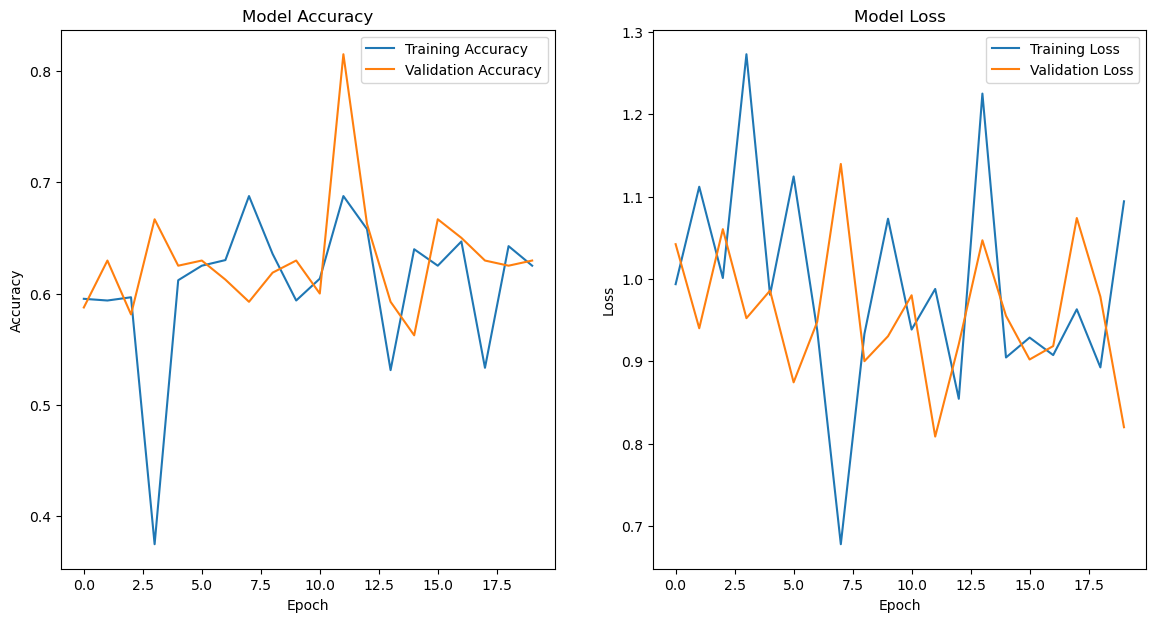

In [15]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


From the abobe graph we can say that the training accuracy has lot of fluctations because the data set i have use has lots of verities to train and same in the Loss also the loss graph is not reducing the traimimg accuracy and loss might be low but the model is trained and will give good results 

# Saving and loading the model

In [17]:
# Save the trained model 
model.save('vgg16_transfer_learning_model.keras')


In [18]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('vgg16_transfer_learning_model.keras')


/Users/vishruthsmanju/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,071,434 (145.23 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,035,718 (72.62 MB)

# Predicting the image

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def prepare_image(filepath, img_height, img_width):
    # Load the image
    img = load_img(filepath, target_size=(img_height, img_width))
    # Convert the image to array
    img = img_to_array(img)
    # Rescale the image
    img = img / 255.0
    # Add a batch dimension
    img = np.expand_dims(img, axis=0)
    return img

# load image to be predicted 
image_path = '/Users/vishruthsmanju/Downloads/Image data/psychedelic/0nglsAEPlxapCcJZA.jpeg'
img = prepare_image(image_path, 150, 150) 
 

# Predict using the loaded model
prediction = model.predict(img)
print("Predicted:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: [[1.1772162e-05 1.0067397e-04 1.1898718e-04 9.9976867e-01]]


Here from the output we can say that

The first number (1.1772162e-05) represents the probability of the first class.
The second number (1.0067397e-04) represents the probability of the second class.
The third number (1.1898718e-04) represents the probability of the third class.
The fourth number (9.9976867e-01) represents the probability of the fourth class, which is very close to 1, indicating that the model is highly confident that the image belongs to 4th class that is "Psychedelics"

# Visualizing the result

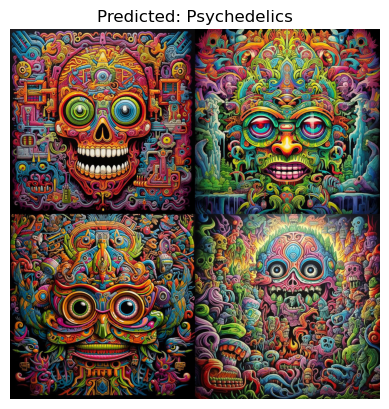

In [23]:
import matplotlib.pyplot as plt

def show_predicted_image(image_path, prediction, class_names):
   
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(f'Predicted: {class_names[np.argmax(prediction)]}')
    plt.axis('off')  
    plt.show()


class_names = ['Animals', 'Portraits', 'Landscapes', 'Psychedelics']


show_predicted_image(image_path, prediction, class_names)
